# Python for Data Science

``pandas``


# Pandas

- Etymology: **pan**el **da**ta
- Written by [Wes McKinney](http://wesmckinney.com/)
- DataFrames for Python
- Read/Write for many formats
- Very efficient operations (much more efficient than plain python)
- Database-like API
- Very popular amongst Data Scientists


## Pandas - Why Python is booming

<img src="figures/pandas_popularity.png" width=500px/>

[Stackoverflow Blog: Why is Python Growing So Quickly?](https://stackoverflow.blog/2017/09/14/python-growing-quickly/)

# Pandas Data Structures


- ``Series``: 
    one-dimensional array of indexed data (*think: column of a table/database*)
- ``DataFrame``: 
    table (*think: data base*)


# The Pandas Series Object

Pandas ``Series``: one-dimensional array of indexed data


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
 
# create a pandas Series
series_a = pd.Series([0.25, 0.5, 0.75, 1.0])
series_a

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
series_a.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
series_a.values

array([0.25, 0.5 , 0.75, 1.  ])

## Generating Pandas Series

Pandas ``Series`` can be created from most python collections.

This also means that they support all content types that python collections support.


In [6]:
# a list
list_a = ['one','two','three']

series_b = pd.Series(list_a)
series_b

0      one
1      two
2    three
dtype: object

In [7]:
# a list with indices
list_a = ['one','two','three']
list_b = ['index_one','index_two','index_three']

series_c = pd.Series(data=list_a, index=list_b)
series_c

index_one        one
index_two        two
index_three    three
dtype: object

In [8]:
# creating Series with same value
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

## Why is this helpful? 

There are many reasons why these indexed structures are helpful. Most of them are related to speed. But many are related to convenience:


In [12]:
fruits = pd.Series([1,0,2,2], index=['apples','oranges','bananas','lemons'])
more_fruits = pd.Series([1,0,1,5], index=['lemons','oranges','apples','bananas'])

fruits + more_fruits

apples     2
bananas    7
lemons     3
oranges    0
dtype: int64

## Some More Examples


In [32]:
berlin_population_dict = {
 '1917': 1681916,
 '1919': 1902509,
 '1925': 4024286,
 '1933': 4242501,
 '1939': 4338756,
 '1945': 2807405,
 '1946': 3170832,
 '1950': 3336026,
 '1960': 3274016,
 '1970': 3208719,
 '1980': 3048759,
 '1990': 3433695,
 '2000': 3382169,
 '2005': 3394000,
 '2010': 3460725}

population = pd.Series(berlin_population_dict)

Text(0.5,0,'Year')

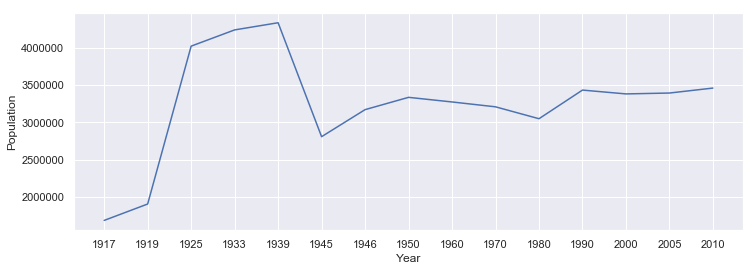

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.figure(figsize=[12,4])
plt.plot(population)
plt.ylabel("Population")
plt.xlabel("Year")

## Indexing Pandas Series


In [30]:
population.name = 'Population'
population.index.name = 'Year'
# note that the indices are strings
population

Year
1917    1681916
1919    1902509
1925    4024286
1933    4242501
1939    4338756
1945    2807405
1946    3170832
1950    3336026
1960    3274016
1970    3208719
1980    3048759
1990    3433695
2000    3382169
2005    3394000
2010    3460725
Name: Population, dtype: int64

In [16]:
population['1917']

1681916

In [17]:
population[['1917','1925','1945','2010']]

Year
1917    1681916
1925    4024286
1945    2807405
2010    3460725
Name: Population, dtype: int64

In [18]:
population['1925':'1950']

Year
1925    4024286
1933    4242501
1939    4338756
1945    2807405
1946    3170832
1950    3336026
Name: Population, dtype: int64

In [19]:
population > 3e6

Year
1917    False
1919    False
1925     True
1933     True
1939     True
1945    False
1946     True
1950     True
1960     True
1970     True
1980     True
1990     True
2000     True
2005     True
2010     True
Name: Population, dtype: bool

In [20]:
population[population > 3e6]

Year
1925    4024286
1933    4242501
1939    4338756
1946    3170832
1950    3336026
1960    3274016
1970    3208719
1980    3048759
1990    3433695
2000    3382169
2005    3394000
2010    3460725
Name: Population, dtype: int64

In [21]:
population_ = population.copy() # copy is important here
population_[population_ > 3e6] = "more than three million"
population_

Year
1917                    1681916
1919                    1902509
1925    more than three million
1933    more than three million
1939    more than three million
1945                    2807405
1946    more than three million
1950    more than three million
1960    more than three million
1970    more than three million
1980    more than three million
1990    more than three million
2000    more than three million
2005    more than three million
2010    more than three million
Name: Population, dtype: object

In [22]:
population[population==1681916]

Year
1917    1681916
Name: Population, dtype: int64

In [23]:
population[(population==1681916) | (population==3460725)]

Year
1917    1681916
2010    3460725
Name: Population, dtype: int64

## Explicit and Positional Indexing

- Pandas objects can be indexed in different ways:
 - explicit indices: what you define as index
 - positional index: the row number
- Depending on how you access values in a ``pandas`` object, explicit or positional indexing is used. 
- To avoid confusion, specify the type of indexing with ``loc`` (explicit indexing) or ``iloc`` (positional indexing)


In [17]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [18]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
# explicit index when indexing
data[1]

'a'

In [5]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
# explicit index when fancy-indexing
data[[1,3]]

1    a
3    b
dtype: object

In [19]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
# positional index when slicing
data[1:3]

3    b
5    c
dtype: object

In [31]:
data = pd.Series(['a', 'b', 'c'], index=['1', '3', '5'])
# positional index when actual index is not integer valued
data[1]

'b'

### Explicit Indexing with ``loc``

In [20]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.loc[1]

'a'

In [21]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
#  loc for explicit indexing
data.loc[1:3]

1    a
3    b
dtype: object

### Positional Indexing with ``iloc``

In [22]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.iloc[1]

'b'

In [23]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.iloc[1:3]

3    b
5    c
dtype: object

## Operations on Pandas Series

- Efficient arithmetic and aggregation operations
- Compatible with ``numpy``

In [24]:
population_in_millions = population / 1e6
population_in_millions

Year
1917    1.681916
1919    1.902509
1925    4.024286
1933    4.242501
1939    4.338756
1945    2.807405
1946    3.170832
1950    3.336026
1960    3.274016
1970    3.208719
1980    3.048759
1990    3.433695
2000    3.382169
2005    3.394000
2010    3.460725
Name: Population, dtype: float64

In [27]:
# histograms
population_in_millions.value_counts()

3    9
4    3
1    2
2    1
Name: Population, dtype: int64

In [28]:
# sorting 
population.sort_values()

Year
1917    1681916
1919    1902509
1945    2807405
1980    3048759
1946    3170832
1970    3208719
1960    3274016
1950    3336026
2000    3382169
2005    3394000
1990    3433695
2010    3460725
1925    4024286
1933    4242501
1939    4338756
Name: Population, dtype: int64

In [31]:
# basic stats
population.describe()

count    1.500000e+01
mean     3.247088e+06
std      7.276748e+05
min      1.681916e+06
25%      3.109796e+06
50%      3.336026e+06
75%      3.447210e+06
max      4.338756e+06
Name: Population, dtype: float64

## Applying Arbitrary Functions

In [32]:
# apply custom functions

def some_function(v):
    '''
    Divides number by a million and returns its integer representation
    '''
    return int(v / 1e6)

some_function(35 * 1e6)


35

In [33]:
population.apply(some_function)

Year
1917    1
1919    1
1925    4
1933    4
1939    4
1945    2
1946    3
1950    3
1960    3
1970    3
1980    3
1990    3
2000    3
2005    3
2010    3
Name: Population, dtype: int64

In [34]:
s = pd.Series(range(int(1e6)))
%timeit s.apply(some_function)

1 loop, best of 3: 926 ms per loop


In [35]:
%timeit (s / 1e6).astype(int)

The slowest run took 10.75 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 10.1 ms per loop


# Missing Values



There are three main options how to deal with missing values:

- drop rows with missing values
- replace missing values with placeholder symbol
- impute missing values with some ML model



In [37]:
berlin_population_dict = {
 '1945': 2807405,
 '1950': 3336026,
 '1955': None,                         
 '1960': 3274016,
 '1965': np.nan,                         
 '1970': 3208719}

population_w_nans = pd.Series(berlin_population_dict)
population_w_nans

1945    2807405.0
1950    3336026.0
1955          NaN
1960    3274016.0
1965          NaN
1970    3208719.0
dtype: float64

## Dropping rows


In [38]:
population_w_nans.isnull()

1945    False
1950    False
1955     True
1960    False
1965     True
1970    False
dtype: bool

In [39]:
population_w_nans[~population_w_nans.isnull()]

1945    2807405.0
1950    3336026.0
1960    3274016.0
1970    3208719.0
dtype: float64

In [40]:
population_w_nans.dropna()

1945    2807405.0
1950    3336026.0
1960    3274016.0
1970    3208719.0
dtype: float64

## Filling with Placeholder


In [41]:
population_w_nans.fillna(method='ffill')

1945    2807405.0
1950    3336026.0
1955    3336026.0
1960    3274016.0
1965    3274016.0
1970    3208719.0
dtype: float64

In [42]:
population_w_nans.fillna(value=population_w_nans.median())

1945    2807405.0
1950    3336026.0
1955    3241367.5
1960    3274016.0
1965    3241367.5
1970    3208719.0
dtype: float64

# The Pandas DataFrame Object

Pandas ``Dataframe``: **a table** (or DataBase - i.e. one or more Series concatenated)


## Generating Pandas DataFrames


In [43]:
some_numpy_array = np.arange(9).reshape((3, 3))
some_numpy_array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [44]:
df = pd.DataFrame(some_numpy_array,
                        index=['a', 'c', 'd'],
                        columns=['Ohio', 'Texas', 'California'])
df


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


### Pandas DataFrame Constructors

|Type | Notes|
|-----|------|
|2D ndarray|A matrix of data, passing optional row and column labels|
|dict of arrays, lists, or tuples|Each sequence becomes a column in the DataFrame; all sequences must be the same length|
|NumPy structured/record array|Treated as the “dict of arrays” case
|dict of Series|Each value becomes a column|
|dict of dicts|Each inner dict becomes a column|
|List of dicts or Series|Each item becomes a row in the DataFrame|
|List of lists or tuples|Treated as the “2D ndarray” case|
|Another DataFrame|The DataFrame’s indexes are used unless different ones are passed|
|NumPy MaskedArray|Like the “2D ndarray” case except masked values become NA/missing in the DataFrame result|



In [14]:
# a DataFrame from a csv file
import os
df_from_csv = pd.read_csv(os.path.join("data","berlin_population.csv"))


### Pandas DataFrame IO 

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Format Type</th>      <th>Data Description</th>      <th>Reader</th>      <th>Writer</th>    </tr>  </thead>  <tbody>    <tr>      <td>text</td>      <td>CSV</td>      <td>read_csv</td>      <td>to_csv</td>    </tr>    <tr>      <td>text</td>      <td>JSON</td>      <td>read_json</td>      <td>to_json</td>    </tr>    <tr>      <td>text</td>      <td>HTML</td>      <td>read_html</td>      <td>to_html</td>    </tr>    <tr>      <td>text</td>      <td>Local clipboard</td>      <td>read_clipboard</td>      <td>to_clipboard</td>    </tr>    <tr>      <td>binary</td>      <td>MS Excel</td>      <td>read_excel</td>      <td>to_excel</td>    </tr>    <tr>      <td>binary</td>      <td>HDF5 Format</td>      <td>read_hdf</td>      <td>to_hdf</td>    </tr>    <tr>      <td>binary</td>      <td>Feather Format</td>      <td>read_feather</td>      <td>to_feather</td>    </tr>    <tr>      <td>binary</td>      <td>Parquet Format</td>      <td>read_parquet</td>      <td>to_parquet</td>    </tr>    <tr>      <td>binary</td>      <td>Msgpack</td>      <td>read_msgpack</td>      <td>to_msgpack</td>    </tr>    <tr>      <td>binary</td>      <td>Stata</td>      <td>read_stata</td>      <td>to_stata</td>    </tr>    <tr>      <td>binary</td>      <td>SAS</td>      <td>read_sas</td>      <td></td>    </tr>    <tr>      <td>binary</td>      <td>Python Pickle Format</td>      <td>read_pickle</td>      <td>to_pickle</td>    </tr>    <tr>      <td>SQL</td>      <td>SQL</td>      <td>read_sql</td>      <td>to_sql</td>    </tr>    <tr>      <td>SQL</td>      <td>Google Big Query</td>      <td>read_gbq</td>      <td>to_gbq</td>    </tr>  </tbody></table>'

## Accessing Values in Pandas Data Frames


In [16]:
# some data
berlin_population_by_borough = {
  'Area in km²': {
    'Charlottenburg-Wilmersdorf': 64.72,
    'Friedrichshain-Kreuzberg': 20.16,
    'Lichtenberg': 52.29,
    'Marzahn-Hellersdorf': 61.74,
    'Mitte': 39.47,
    'Neukölln': 44.93,
    'Pankow': 103.01,
    'Spandau': 91.91,
    'Steglitz-Zehlendorf': 102.5,
    'Tempelhof-Schöneberg': 53.09,
    'Treptow-Köpenick': 168.42},
 'Population 30 September 2010': {
    'Charlottenburg-Wilmersdorf': 320014,
    'Friedrichshain-Kreuzberg': 268831,
    'Lichtenberg': 259881,
    'Marzahn-Hellersdorf': 248264,
    'Mitte': 332100,
    'Neukölln': 310283,
    'Pankow': 368956,
    'Spandau': 225420,
    'Steglitz-Zehlendorf': 293989,
    'Tempelhof-Schöneberg': 335060,
    'Treptow-Köpenick': 241335}}


In [17]:
# a DataFrame from a dictionary of dictionaries
df = pd.DataFrame(berlin_population_by_borough)
df

,Area in km²,Population 30 September 2010
Charlottenburg-Wilmersdorf,64.72,320014
Friedrichshain-Kreuzberg,20.16,268831
Lichtenberg,52.29,259881
Marzahn-Hellersdorf,61.74,248264
Mitte,39.47,332100
Neukölln,44.93,310283
Pankow,103.01,368956
Spandau,91.91,225420
Steglitz-Zehlendorf,102.50,293989
Tempelhof-Schöneberg,53.09,335060


In [18]:
# like Series (and tables in DBs) DataFrames have indices
df.index

Index(['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow', 'Spandau',
       'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Treptow-Köpenick'],
      dtype='object')

In [19]:
# Accessing by row and column index
df.loc['Friedrichshain-Kreuzberg','Area in km²']

20.16

In [20]:
# Accessing an entire column
df.loc[:,'Area in km²']

Charlottenburg-Wilmersdorf     64.72
Friedrichshain-Kreuzberg       20.16
Lichtenberg                    52.29
Marzahn-Hellersdorf            61.74
Mitte                          39.47
Neukölln                       44.93
Pankow                        103.01
Spandau                        91.91
Steglitz-Zehlendorf           102.50
Tempelhof-Schöneberg           53.09
Treptow-Köpenick              168.42
Name: Area in km², dtype: float64

In [21]:
# Accessing an entire column
df['Area in km²']

Charlottenburg-Wilmersdorf     64.72
Friedrichshain-Kreuzberg       20.16
Lichtenberg                    52.29
Marzahn-Hellersdorf            61.74
Mitte                          39.47
Neukölln                       44.93
Pankow                        103.01
Spandau                        91.91
Steglitz-Zehlendorf           102.50
Tempelhof-Schöneberg           53.09
Treptow-Köpenick              168.42
Name: Area in km², dtype: float64

In [22]:
[b for b in df.index if 'berg' in b.lower()]

['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Tempelhof-Schöneberg']

In [23]:
df.loc[['Friedrichshain-Kreuzberg', 'Lichtenberg', 'Tempelhof-Schöneberg'],:]

,Area in km²,Population 30 September 2010
Friedrichshain-Kreuzberg,20.16,268831
Lichtenberg,52.29,259881
Tempelhof-Schöneberg,53.09,335060


In [25]:
# a single column of a DataFrame is a Series
df['Population 30 September 2010']

Charlottenburg-Wilmersdorf    320014
Friedrichshain-Kreuzberg      268831
Lichtenberg                   259881
Marzahn-Hellersdorf           248264
Mitte                         332100
Neukölln                      310283
Pankow                        368956
Spandau                       225420
Steglitz-Zehlendorf           293989
Tempelhof-Schöneberg          335060
Treptow-Köpenick              241335
Name: Population 30 September 2010, dtype: int64

In [26]:
# boolean indexing
df['Population 30 September 2010'] > 3e5

Charlottenburg-Wilmersdorf     True
Friedrichshain-Kreuzberg      False
Lichtenberg                   False
Marzahn-Hellersdorf           False
Mitte                          True
Neukölln                       True
Pankow                         True
Spandau                       False
Steglitz-Zehlendorf           False
Tempelhof-Schöneberg           True
Treptow-Köpenick              False
Name: Population 30 September 2010, dtype: bool

In [27]:
# boolean indexing
df[df['Population 30 September 2010'] > 3e5]

,Area in km²,Population 30 September 2010
Charlottenburg-Wilmersdorf,64.72,320014
Mitte,39.47,332100
Neukölln,44.93,310283
Pankow,103.01,368956
Tempelhof-Schöneberg,53.09,335060


In [28]:
# boolean row indexing with column indexing
df.loc[df['Population 30 September 2010'] > 3e5,'Population 30 September 2010']

Charlottenburg-Wilmersdorf    320014
Mitte                         332100
Neukölln                      310283
Pankow                        368956
Tempelhof-Schöneberg          335060
Name: Population 30 September 2010, dtype: int64

## Operations on Pandas Data Frames


- All Series operations work on DataFrame columns
- DataFrames support all standard DB operations and more

In [62]:
df['Density'] = df['Population 30 September 2010'] / df['Area in km²']
df = df.sort_values(by=['Density'])
df

,Area in km²,Population 30 September 2010,Density
Treptow-Köpenick,168.42,241335,1432.935518
Spandau,91.91,225420,2452.616690
Steglitz-Zehlendorf,102.50,293989,2868.185366
Pankow,103.01,368956,3581.749345
Marzahn-Hellersdorf,61.74,248264,4021.120829
Charlottenburg-Wilmersdorf,64.72,320014,4944.592089
Lichtenberg,52.29,259881,4969.994263
Tempelhof-Schöneberg,53.09,335060,6311.169712
Neukölln,44.93,310283,6905.920320
Mitte,39.47,332100,8413.985305


## Database style joins with pandas

In [4]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [5]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


### Inner join

In [6]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


### Outer join

In [7]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


## Concatenation

Remember numpy array concatenation

In [8]:
import numpy as np
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [10]:
np.concatenate([arr, arr], axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Concatenation with Pandas


In [12]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s1

a    0
b    1
dtype: int64

In [11]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s2

c    2
d    3
e    4
dtype: int64

In [13]:
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [15]:
pd.concat([s1, s2, s3], axis=1, sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


## Group-by and Aggregations

Aka split-apply-combine


<img src="figures/split-apply-combine.png" width=600px>



In [291]:
df = pd.DataFrame({ 'key1' : ['a', 'a', 'b', 'b', 'a'],
                    'key2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.502392,-0.788310
1,a,two,-1.166386,0.727721
2,b,one,0.304301,0.407109
3,b,two,-0.577516,0.121743
4,a,one,0.550197,0.395730


In [292]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [293]:
grouped.mean()

key1
a    0.295401
b   -0.136607
Name: data1, dtype: float64

In [294]:
grouped.max()

key1
a    1.502392
b    0.304301
Name: data1, dtype: float64

In [295]:
grouped.quantile(.9)

key1
a    1.311953
b    0.216119
Name: data1, dtype: float64

In [302]:
df.groupby(['key1','key2'])['data1'].agg(['mean','sum']).rename(columns={'mean': 'my_mean', 'sum':'my_sum'})

my_mean    my_sum
key1 key2                    
a    one   1.026294  2.052589
     two  -1.166386 -1.166386
b    one   0.304301  0.304301
     two  -0.577516 -0.577516

### Iterating over groups

In [22]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)
    

a
  key1 key2     data1     data2
0    a  one  1.163201 -2.187141
1    a  two -1.526825  0.310791
4    a  one  0.276677 -1.389537
b
  key1 key2     data1     data2
2    b  one -1.059584  1.204863
3    b  two -2.193576 -0.858221


In [23]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
    

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.163201 -2.187141
4    a  one  0.276677 -1.389537
('a', 'two')
  key1 key2     data1     data2
1    a  two -1.526825  0.310791
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.059584  1.204863
('b', 'two')
  key1 key2     data1     data2
3    b  two -2.193576 -0.858221


# Some Experiments with Names in Berlin

Source [data portal Berlin](https://daten.berlin.de/search/node/vornamen)


In [63]:
import urllib
import os

basedir = os.path.join("data","vornamen")
os.makedirs(basedir, exist_ok=True)

base_url = "https://www.berlin.de/daten/liste-der-vornamen-{}/{}.csv"

boroughs = [
"charlottenburg-wilmersdorf",
"friedrichshain-kreuzberg",
"lichtenberg",
"marzahn-hellersdorf",
"mitte",
"neukoelln",
"pankow",
"reinickendorf",
"spandau",
"steglitz-zehlendorf",
"tempelhof-schoeneberg",
"treptow-koepenick"
]

years = range(2013,2018)


In [64]:
# download all name files from Berlin open data portal
all_names = []

for borough in boroughs:
    for year in years:
        try:
            url = base_url.format(year, borough)
            filename = os.path.join(basedir, "{}-{}.csv".format(year,borough))
            urllib.request.urlretrieve(url, filename)
            df_vornamen_stadtteil = pd.read_csv(filename,sep=';',error_bad_lines=False)
            df_vornamen_stadtteil['borough'] = borough
            df_vornamen_stadtteil['year'] = year
            all_names.append(df_vornamen_stadtteil)
        except:
            print("File {} not found".format(url))

# concatenate DataFrames
all_names_df = pd.concat(all_names, sort=True)


In [65]:
all_names_df.sample(n=10)

,anzahl,borough,geschlecht,position,vorname,year
604,1,marzahn-hellersdorf,m,NaN,Laurin,2014
766,1,treptow-koepenick,m,2.0,Otis,2017
633,2,mitte,w,NaN,Annabelle,2016
422,1,steglitz-zehlendorf,m,NaN,Darijan,2015
576,2,neukoelln,m,NaN,Albert,2014
69,12,lichtenberg,w,NaN,Luise,2016
825,1,lichtenberg,w,2.0,NaN,2017
661,2,mitte,w,NaN,Christina,2014
127,8,spandau,m,NaN,Peter,2013
2436,1,neukoelln,m,NaN,Siraç,2014


In [66]:
# names for boys in friedrichshain in 2016 sorted by popularity
all_names_df.loc[
    (all_names_df['borough']=="friedrichshain-kreuzberg") 
    & (all_names_df['geschlecht']=='m') 
    & (all_names_df['year']==2016)].sort_values(by='anzahl', ascending=False)

,anzahl,borough,geschlecht,position,vorname,year
3,42,friedrichshain-kreuzberg,m,NaN,Anton,2016
6,41,friedrichshain-kreuzberg,m,NaN,Emil,2016
7,40,friedrichshain-kreuzberg,m,NaN,Ali,2016
8,39,friedrichshain-kreuzberg,m,NaN,Alexander,2016
10,37,friedrichshain-kreuzberg,m,NaN,Leon,2016
12,35,friedrichshain-kreuzberg,m,NaN,Elias,2016
13,33,friedrichshain-kreuzberg,m,NaN,Karl,2016
14,33,friedrichshain-kreuzberg,m,NaN,Paul,2016
15,31,friedrichshain-kreuzberg,m,NaN,Oskar,2016
17,30,friedrichshain-kreuzberg,m,NaN,Felix,2016


In [70]:
# most popular names per year and borough
all_names_df.groupby(['borough','year'],as_index=False).\
    agg({"anzahl": "max",'vorname':'first'})

,borough,year,anzahl,vorname
0,charlottenburg-wilmersdorf,2013,121,Marie
1,charlottenburg-wilmersdorf,2014,118,Marie
2,charlottenburg-wilmersdorf,2015,115,Marie
3,charlottenburg-wilmersdorf,2016,111,Marie
4,charlottenburg-wilmersdorf,2017,72,Marie
5,friedrichshain-kreuzberg,2013,71,Marie
6,friedrichshain-kreuzberg,2014,70,Sophie
7,friedrichshain-kreuzberg,2015,65,Marie
8,friedrichshain-kreuzberg,2016,64,Charlotte
9,friedrichshain-kreuzberg,2017,47,Marie


In [71]:
# least popular names per year and borough
all_names_df.groupby(['borough','year'],as_index=False).\
    agg({"anzahl": "min",'vorname':'last'})

,borough,year,anzahl,vorname
0,charlottenburg-wilmersdorf,2013,1,Đželila
1,charlottenburg-wilmersdorf,2014,1,Şerife
2,charlottenburg-wilmersdorf,2015,1,Şevket
3,charlottenburg-wilmersdorf,2016,1,Şirin
4,charlottenburg-wilmersdorf,2017,1,Şervan
5,friedrichshain-kreuzberg,2013,1,Şemsi
6,friedrichshain-kreuzberg,2014,1,Șura
7,friedrichshain-kreuzberg,2015,1,Šefik
8,friedrichshain-kreuzberg,2016,1,Şükrü
9,friedrichshain-kreuzberg,2017,1,Şiyar


# Exercises 

We will use pandas to get some insights into what the Berlin Senat spends money on

In [122]:
df_ausgaben_berlin = pd.read_csv("data/zuwendungen-berlin.csv.gz")
df_ausgaben_berlin.sample(n=10)

,Name,Geber,Art,Jahr,Anschrift,Politikbereich,Zweck,Betrag
4885,"Modul e. V., Förderverein Modernes Lehren und ...","Senatsverwaltung für Arbeit, Integration und F...",Projektförderung,2012,"Grüntaler Straße 62, 13359 Berlin",Arbeit,BVBO / Rheingau-Gymnasium / Jahrgangsstufe Kl....,4139
16451,Alevitische Gemeinde zu Berlin e. V.,"Senatsverwaltung für Arbeit, Integration und F...",Projektförderung,2014,"Waldemarstraße 20, 10999 Berlin",Arbeit,"FAV - Interkulturelle Helfer für Flüchtlinge, ...",7259
15497,Verein für ambulante Versorgung Hohenschönhaus...,"Senatsverwaltung für Arbeit, Integration und F...",Projektförderung,2013,"Ribnitzer Straße 1 B, 13051 Berlin",Arbeit,Unterstützung der Stadtteilarbeit des Vereins ...,45072
17859,BVG,Senatsverwaltung für Stadtentwicklung und Umwelt,Projektförderung,2014,"Holzmarktstraße 15 - 17, 10179 Berlin",Verkehr,"U5; PB I; Projektlos 3.0, Rohbau sdl. Bundestag",6237250
16441,Albatros-Lebensnetz gGmbH,Senatsverwaltung für Gesundheit und Soziales,Projektförderung,2014,"Berliner Straße 14, 13507 Berlin",Gesundheit,Albatros- Lebensnetz gGmbH Schwangerschafts-un...,251727
39643,Tauwetter - vereint gegen sexualisierte Gewalt...,Senatsverwaltung für Gesundheit und Soziales,Projektförderung,2016,"Gneisenaustraße 2a, 10961 Berlin",Gesundheit,"Tauwetter, Informations- und Beratungsstelle f...",142532
17573,Bouledozer e. V.,Senatsverwaltung für Inneres und Sport,Projektförderung,2014,"Kruppstraße 5, 10557 Berlin",Sport,"Teilhabeprogramm""Boule ist Cool""",16000
31121,Stiftung Synanon,Senatsverwaltung für Gesundheit und Soziales,Projektförderung,2015,"Dorfstraße 9, 13051 Berlin",Gesundheit,Suchtselbsthilfe Synanon - Sicherung der Aufna...,290048
1536,BTB Bildungszentrum GmbH,"Senatsverwaltung für Arbeit, Integration und F...",Projektförderung,2012,"Straßburger Straße 6 - 9, 10405 Berlin",Arbeit,"Modulare Qualifizierung ""Lager & Logistik 1-12""",3110
27400,Frauenzentrum Schokoladenfabrik e. V.,"Senatsverwaltung für Arbeit, Integration und F...",Projektförderung,2015,"Naunynstraße 72, 10997 Berlin",Frauen,Förderung der Gleichstellung von Frauen und Mä...,175808


## Assignment 01

**Extract some summary statistics of the money spent by the Senat of Berlin**

Write a function ``assignment_04_01`` that takes the data frame of spendings and returns

- the count
 - the mean
 - the standard deviation
 - the minimum
 - the 25% percentile
 - the 50% percentile (median)
 - the 75% percentile
 - the maximum
 
of all spendings in a list. The data is in the subdirectory ``data`` and can be loaded by ``df = pd.read_csv("data/zuwendungen-berlin.csv.gz")``. For convenient compuation of the summary statistics check the pandas Series API for ``describe()``

```python

def assignment_04_01(df):
    spending_statistics = df. ...
    ...
    return spending_statistics

```


## Assignment 02

**How much is each recipient of a spending receiving in total?**

Write a function ``assignment_04_02`` that takes the data frame of spendings and groups by recipient (column ``'Name'``) and then sums all money received for each recipient. Return the names of the recipients that received in total 143 Euros. 

```python

def assignment_04_01(df):
    money_received = df.groupby(['Name']). ...
    ...
    return names_of_recipients

```


## Assignment 03

**How much is Berlin spending on each political ressort?**

Write a function ``assignment_04_03`` that takes the data frame of spendings (spending is the column 'Betrag'), groups by political ressort (in german 'Politikbereich') and computes the 

 - minimum
 - median
 - maximum

of the spendings on each political ressort. Return the aggregates in the political ressort ('Politikbereich') 'sciences' ('Wissenschaft')

```python

def assignment_04_03(df):
    spending_per_ressort = df.groupby(['Politikbereich']). ...
    ...
    return 

```


## Assignment 04

**How much is Berlin spending on each U-Bahn?**

Write a function ``assignment_04_04`` that takes the data frame of spendings, filters for transportation (german 'Verkehr'), groups by the specific ubahn and sums up the spendings. For the ubahn grouping you can extract the ubahn with the regular expression ``'U[1-9]'``. The function should return the ubahn names ordered from most (first element) to least expensive (last element).


```python

def assignment_04_04(df):
    df['ubahn'] = df['Zweck'].str.extract('(U[1-9])') ...
    ...
    return 

```
